In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_excel("../../dataset/First Experiment/Turkish/Turkish(SKG_BRU).xlsx")
df = pd.DataFrame(data)

In [4]:
df.head()

,departure_time,arrival_time,days_before,day_of_week,num_of_luggage,num_of_stops,overnight_flight,Class,price
0,09:45:00,10:40:00,0,2,1,1,1,110,217.09
1,09:45:00,17:20:00,0,2,1,1,0,220,217.09
2,11:00:00,17:20:00,1,3,1,1,0,110,187.09
3,09:45:00,21:35:00,2,4,1,1,0,110,187.09
4,09:45:00,17:20:00,3,5,1,1,0,110,162.09


In [5]:
for i in df.columns:
  print(i,"\t\t-\t", df[i].isna().mean()*100)

departure_time 		-	 0.0
arrival_time 		-	 0.0
days_before 		-	 0.0
day_of_week 		-	 0.0
num_of_luggage 		-	 0.0
num_of_stops 		-	 0.0
overnight_flight 		-	 0.0
Class 		-	 0.0
price 		-	 0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1123 entries, 0 to 1122
Data columns (total 9 columns):
departure_time      1123 non-null object
arrival_time        1123 non-null object
days_before         1123 non-null int64
day_of_week         1123 non-null int64
num_of_luggage      1123 non-null int64
num_of_stops        1123 non-null int64
overnight_flight    1123 non-null int64
Class               1123 non-null int64
price               1123 non-null float64
dtypes: float64(1), int64(6), object(2)
memory usage: 79.1+ KB


In [7]:
df.shape

(1123, 9)

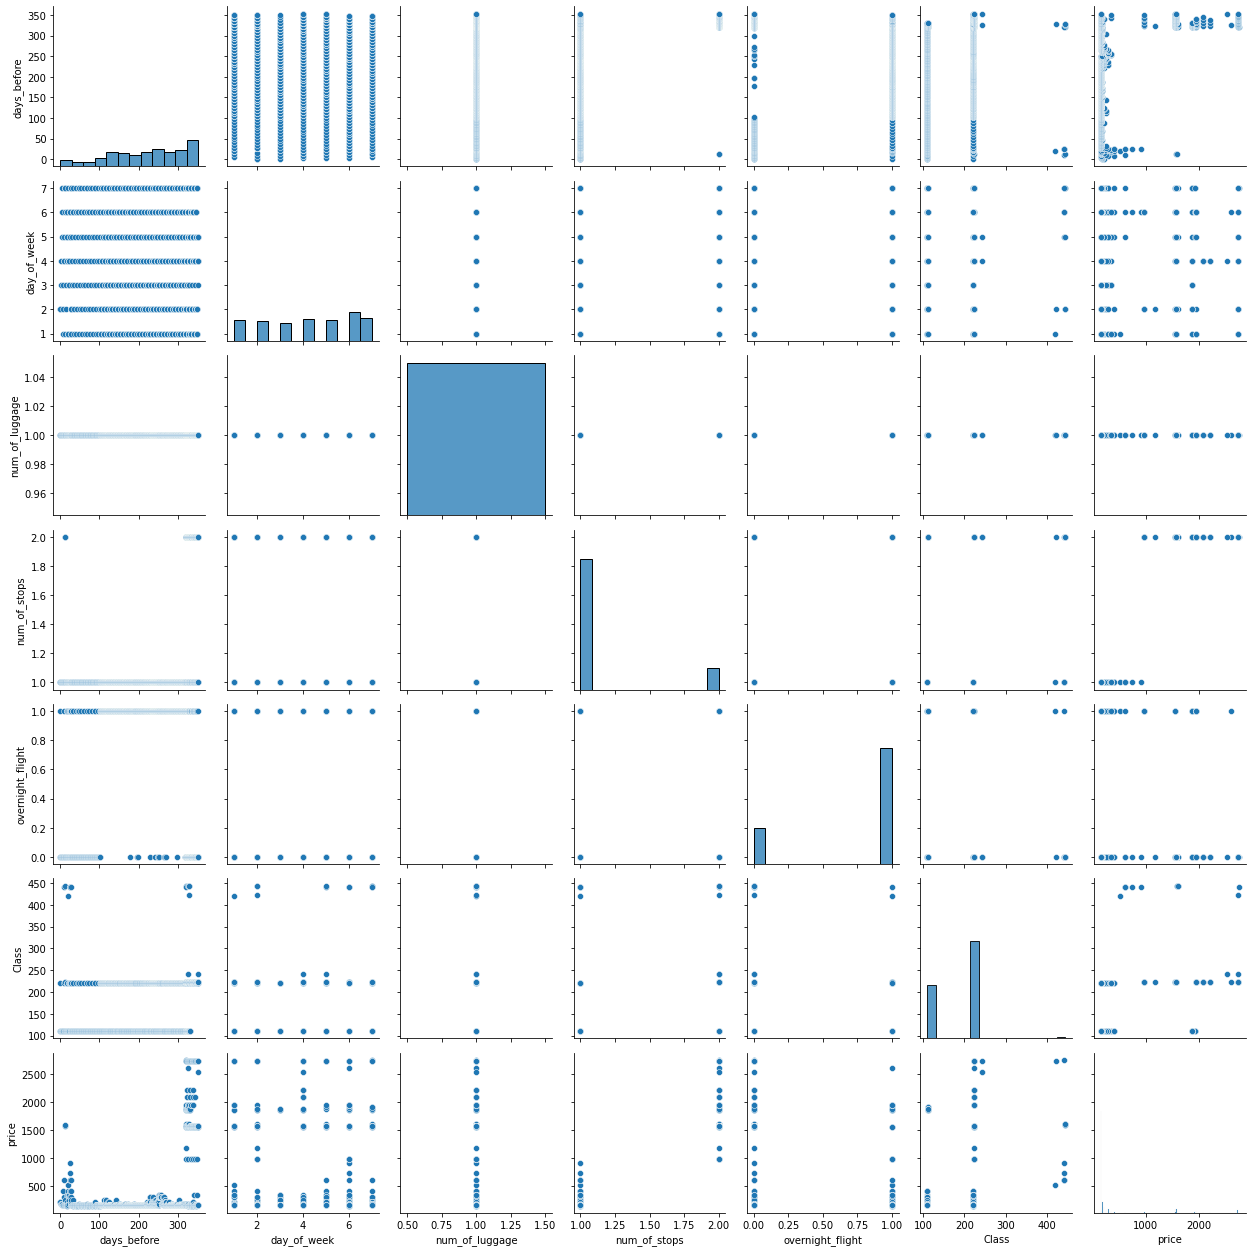

In [8]:
sns.pairplot(df)
plt.tight_layout()

In [9]:
df['departure_time'] = pd.to_datetime(df['departure_time'], format='%H:%M:%S')

In [10]:
df['arrival_time'] = pd.to_datetime(df['arrival_time'], format='%H:%M:%S')

In [11]:
df.head()

,departure_time,arrival_time,days_before,day_of_week,num_of_luggage,num_of_stops,overnight_flight,Class,price
0,1900-01-01 09:45:00,1900-01-01 10:40:00,0,2,1,1,1,110,217.09
1,1900-01-01 09:45:00,1900-01-01 17:20:00,0,2,1,1,0,220,217.09
2,1900-01-01 11:00:00,1900-01-01 17:20:00,1,3,1,1,0,110,187.09
3,1900-01-01 09:45:00,1900-01-01 21:35:00,2,4,1,1,0,110,187.09
4,1900-01-01 09:45:00,1900-01-01 17:20:00,3,5,1,1,0,110,162.09


In [12]:
df['departuretime'] = pd.to_datetime(df['departure_time']).astype(np.int64)

In [13]:
df['arrivaltime'] = pd.to_datetime(df['arrival_time']).astype(np.int64)

In [14]:
df.head()

,departure_time,arrival_time,days_before,day_of_week,num_of_luggage,num_of_stops,overnight_flight,Class,price,departuretime,arrivaltime
0,1900-01-01 09:45:00,1900-01-01 10:40:00,0,2,1,1,1,110,217.09,-2208953700000000000,-2208950400000000000
1,1900-01-01 09:45:00,1900-01-01 17:20:00,0,2,1,1,0,220,217.09,-2208953700000000000,-2208926400000000000
2,1900-01-01 11:00:00,1900-01-01 17:20:00,1,3,1,1,0,110,187.09,-2208949200000000000,-2208926400000000000
3,1900-01-01 09:45:00,1900-01-01 21:35:00,2,4,1,1,0,110,187.09,-2208953700000000000,-2208911100000000000
4,1900-01-01 09:45:00,1900-01-01 17:20:00,3,5,1,1,0,110,162.09,-2208953700000000000,-2208926400000000000


In [15]:
df.columns

Index(['departure_time', 'arrival_time', 'days_before', 'day_of_week',
       'num_of_luggage', 'num_of_stops', 'overnight_flight', 'Class', 'price',
       'departuretime', 'arrivaltime'],
      dtype='object')

In [16]:
df = df[['departuretime','arrivaltime','day_of_week', 'days_before','num_of_luggage', 'num_of_stops', 'overnight_flight','Class','price']]

In [17]:
del df['departuretime']

In [18]:
del df['arrivaltime']

In [19]:
#df = df.apply(np.int64)

In [20]:
df.head()

,day_of_week,days_before,num_of_luggage,num_of_stops,overnight_flight,Class,price
0,2,0,1,1,1,110,217.09
1,2,0,1,1,0,220,217.09
2,3,1,1,1,0,110,187.09
3,4,2,1,1,0,110,187.09
4,5,3,1,1,0,110,162.09


In [21]:
df.to_csv('skg_bru_proc.csv')

In [22]:
X = df.drop(['price'], axis=1)
y = df['price']

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

In [55]:
ML_Model = []
accuracy = []

#function to call for storing the results
def storeResults(model, a):
    ML_Model.append(model)
    accuracy.append(round(a, 3))

# AdaBoost

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [25]:
crossvalidation=KFold(n_splits=10,shuffle=True,random_state=1)

In [26]:
from sklearn.ensemble import AdaBoostRegressor
search_grid={'n_estimators':[5000,10000,20000],'learning_rate':[.001,0.01,.1],'random_state':[1]}
adr = AdaBoostRegressor()
search=GridSearchCV(estimator=adr,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1,cv=crossvalidation)
search.fit(X_train,y_train)


GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=AdaBoostRegressor(), n_jobs=1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'n_estimators': [5000, 10000, 20000],
                         'random_state': [1]},
             scoring='neg_mean_squared_error')

In [27]:
y_pred = search.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.9141499418120228


In [56]:
ab_sc = r2_score(y_test, y_pred)
storeResults('AdaBoost',ab_sc)

# Bagging Regressor

In [28]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

clf = BaggingRegressor(DecisionTreeRegressor(),n_estimators=10000, random_state=0)

clf.fit(X_train,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=10000,
                 random_state=0)

In [29]:
y_pred = clf.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.9395105338988661


In [57]:
bag_sc = r2_score(y_test, y_pred)
storeResults('Bagging',bag_sc)

# Gradient Boosting

In [30]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=10000, random_state=0)

gbr.fit(X_train,y_train)

y_pred = gbr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.9409835878308835


In [58]:
gb_sc = r2_score(y_test, y_pred)
storeResults('Gradient Boosting',gb_sc)

# Decision Tree

In [31]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=0)

dtr.fit(X_train,y_train)

y_pred = dtr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.9409838717993053


In [59]:
dt_sc = r2_score(y_test, y_pred)
storeResults('Decision Tree',dt_sc)

# RAndom Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

rfr = RandomForestRegressor(max_depth=2, random_state=0)

grid_forest = GridSearchCV(rfr,param_grid=param_grid)

grid_forest.fit(X_train,y_train)

y_pred = grid_forest.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.9250417999664958


In [60]:
rf_sc = r2_score(y_test, y_pred)
storeResults('Random Forest',rf_sc)

# Extra Tree

In [33]:
from sklearn.ensemble import ExtraTreesRegressor

etr = ExtraTreesRegressor(n_estimators=10000, random_state=0)

etr.fit(X_train,y_train)

y_pred = etr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.9409838297152406


In [61]:
et_sc = r2_score(y_test, y_pred)
storeResults('Extra Tree',et_sc)

# SVR

In [34]:
from sklearn.svm import SVR

sr = SVR(C=1.0, epsilon=0.2)

sr.fit(X_train,y_train)

y_pred = sr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: -0.16371223014808778


In [62]:
svr_sc = r2_score(y_test, y_pred)
storeResults('SVR',svr_sc)

# MLP

In [35]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(random_state=1, max_iter=500)
mlp.fit(X_train,y_train)

y_pred = mlp.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.49628566421658016


In [63]:
mlp_sc = r2_score(y_test, y_pred)
storeResults('MLP',mlp_sc)

# DL

In [36]:
X_train = np.array(X).reshape(X.shape[0], X.shape[1], 1)
X_test = np.array(X).reshape(X.shape[0], X.shape[1], 1)

In [37]:
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Create 2 virtual GPUs with 1GB memory each
  try:
    tf.config.set_logical_device_configuration(
        gpus[0],
        [tf.config.LogicalDeviceConfiguration(memory_limit=1024),
         tf.config.LogicalDeviceConfiguration(memory_limit=1024)])
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPU,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

1 Physical GPU, 2 Logical GPUs


In [38]:
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

# VGG11

In [39]:
def vgg11():
    
    model = Sequential()
    
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(64, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(128, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [40]:
model = vgg11()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 6, 32)             128       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 6, 64)             6208      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 6, 128)            41088     
_________________________________________________________________
flatten (Flatten)            (None, 768)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                38450     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2

In [41]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

Epoch 1/200
29/29 [==============================] - 2s 9ms/step - loss: 11779.6719 - val_loss: 2052022.6250
Epoch 2/200
29/29 [==============================] - 0s 3ms/step - loss: 6837.2935 - val_loss: 1953826.2500
Epoch 3/200
29/29 [==============================] - 0s 3ms/step - loss: 5641.6787 - val_loss: 1925132.5000
Epoch 4/200
29/29 [==============================] - 0s 4ms/step - loss: 5628.4136 - val_loss: 1987741.8750
Epoch 5/200
29/29 [==============================] - 0s 4ms/step - loss: 5903.6099 - val_loss: 1915762.3750
Epoch 6/200
29/29 [==============================] - 0s 3ms/step - loss: 5279.4565 - val_loss: 1992239.7500
Epoch 7/200
29/29 [==============================] - 0s 3ms/step - loss: 5187.9922 - val_loss: 1930844.7500
Epoch 8/200
29/29 [==============================] - 0s 4ms/step - loss: 5426.4922 - val_loss: 1976645.2500
Epoch 9/200
29/29 [==============================] - 0s 4ms/step - loss: 5150.0361 - val_loss: 1882260.6250
Epoch 10/200
29/29 [=======

Epoch 151/200
29/29 [==============================] - 0s 5ms/step - loss: 1123.8986 - val_loss: 2064800.2500
Epoch 152/200
29/29 [==============================] - 0s 5ms/step - loss: 1070.3782 - val_loss: 1985597.8750
Epoch 153/200
29/29 [==============================] - 0s 5ms/step - loss: 1187.7964 - val_loss: 2092417.1250
Epoch 154/200
29/29 [==============================] - 0s 5ms/step - loss: 1087.4468 - val_loss: 2047475.8750
Epoch 155/200
29/29 [==============================] - 0s 5ms/step - loss: 1043.0334 - val_loss: 2051177.1250
Epoch 156/200
29/29 [==============================] - 0s 4ms/step - loss: 1190.8474 - val_loss: 2070955.3750
Epoch 157/200
29/29 [==============================] - 0s 4ms/step - loss: 1059.5704 - val_loss: 2061225.6250
Epoch 158/200
29/29 [==============================] - 0s 4ms/step - loss: 1083.2474 - val_loss: 2093894.5000
Epoch 159/200
29/29 [==============================] - 0s 4ms/step - loss: 1081.4264 - val_loss: 2077531.1250
Epoch 160/

In [42]:
y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Accuracy score of the predictions: -0.11776719098568766


In [64]:
vgg_sc = r2_score(y, y_pred)
storeResults('VGG11',vgg_sc)

# VGG13

In [43]:
def vgg13():
    
    model = Sequential()
    
    model.add(Conv1D(16, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(64, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [44]:
model = vgg13()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 6, 16)             64        
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 6, 32)             1568      
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 6, 64)             10304     
_________________________________________________________________
flatten_1 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                19250     
_________________________________________________________________
dense_4 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [45]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

Epoch 1/200
29/29 [==============================] - 1s 10ms/step - loss: 23825.5898 - val_loss: 1791239.5000
Epoch 2/200
29/29 [==============================] - 0s 5ms/step - loss: 9216.0088 - val_loss: 1991857.7500
Epoch 3/200
29/29 [==============================] - 0s 5ms/step - loss: 7745.0703 - val_loss: 2061748.0000
Epoch 4/200
29/29 [==============================] - 0s 4ms/step - loss: 7001.0371 - val_loss: 2077940.8750
Epoch 5/200
29/29 [==============================] - 0s 4ms/step - loss: 6260.2783 - val_loss: 2034838.7500
Epoch 6/200
29/29 [==============================] - 0s 5ms/step - loss: 5889.9839 - val_loss: 1909644.0000
Epoch 7/200
29/29 [==============================] - 0s 4ms/step - loss: 5723.4683 - val_loss: 2025613.3750
Epoch 8/200
29/29 [==============================] - 0s 5ms/step - loss: 5271.7588 - val_loss: 1965646.8750
Epoch 9/200
29/29 [==============================] - 0s 5ms/step - loss: 5365.2524 - val_loss: 1963599.1250
Epoch 10/200
29/29 [======

Epoch 151/200
29/29 [==============================] - 0s 5ms/step - loss: 2152.6074 - val_loss: 2077999.6250
Epoch 152/200
29/29 [==============================] - 0s 4ms/step - loss: 1918.6440 - val_loss: 2043731.6250
Epoch 153/200
29/29 [==============================] - 0s 4ms/step - loss: 1890.3357 - val_loss: 2045035.2500
Epoch 154/200
29/29 [==============================] - 0s 5ms/step - loss: 1823.0354 - val_loss: 2017957.8750
Epoch 155/200
29/29 [==============================] - 0s 4ms/step - loss: 1825.4948 - val_loss: 2062175.3750
Epoch 156/200
29/29 [==============================] - 0s 5ms/step - loss: 1811.3965 - val_loss: 2043862.7500
Epoch 157/200
29/29 [==============================] - 0s 5ms/step - loss: 1847.0663 - val_loss: 2003345.8750
Epoch 158/200
29/29 [==============================] - 0s 5ms/step - loss: 1875.8505 - val_loss: 2007617.8750
Epoch 159/200
29/29 [==============================] - 0s 5ms/step - loss: 1698.1385 - val_loss: 1986950.2500
Epoch 160/

In [46]:
y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Accuracy score of the predictions: -0.10241494514350302


In [65]:
vgg1_sc = r2_score(y, y_pred)
storeResults('VGG13',vgg1_sc)

# ResNet18

In [47]:
def resnet18():
    
    model = Sequential()
    
    model.add(Conv1D(16, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(64, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = resnet18()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 6, 16)             64        
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 6, 32)             1568      
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 6, 64)             10304     
_________________________________________________________________
flatten_2 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 50)                19250     
_________________________________________________________________
dense_7 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

In [48]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
29/29 [==============================] - 0s 7ms/step - loss: 20455.0527 - val_loss: 1933766.2500
Epoch 2/200
29/29 [==============================] - 0s 5ms/step - loss: 8671.9004 - val_loss: 1980251.1250
Epoch 3/200
29/29 [==============================] - 0s 5ms/step - loss: 7100.7188 - val_loss: 2033083.2500
Epoch 4/200
29/29 [==============================] - 0s 5ms/step - loss: 6360.1255 - val_loss: 2046659.3750
Epoch 5/200
29/29 [==============================] - ETA: 0s - loss: 5806.40 - 0s 6ms/step - loss: 5676.0122 - val_loss: 1971103.8750
Epoch 6/200
29/29 [==============================] - 0s 5ms/step - loss: 5498.6274 - val_loss: 2007851.3750
Epoch 7/200
29/29 [==============================] - 0s 4ms/step - loss: 5437.3608 - val_loss: 1925156.2500
Epoch 8/200
29/29 [==============================] - 0s 5ms/step - loss: 5413.0396 - val_loss: 2022690.3750
Epoch 9/200
29/29 [==============================] - 0s 5ms/step - loss: 5182.2026 - val_loss: 1968838.1250
E

Epoch 76/200
29/29 [==============================] - 0s 4ms/step - loss: 4326.4395 - val_loss: 2007154.5000
Epoch 77/200
29/29 [==============================] - 0s 5ms/step - loss: 3995.4028 - val_loss: 2037001.8750
Epoch 78/200
29/29 [==============================] - 0s 5ms/step - loss: 3972.7603 - val_loss: 1998268.5000
Epoch 79/200
29/29 [==============================] - 0s 4ms/step - loss: 3895.0044 - val_loss: 2020985.0000
Epoch 80/200
29/29 [==============================] - 0s 4ms/step - loss: 3884.7002 - val_loss: 1908651.6250
Epoch 81/200
29/29 [==============================] - 0s 5ms/step - loss: 4118.7593 - val_loss: 2070065.1250
Epoch 82/200
29/29 [==============================] - 0s 4ms/step - loss: 3845.1238 - val_loss: 2002537.0000
Epoch 83/200
29/29 [==============================] - 0s 4ms/step - loss: 4247.7080 - val_loss: 2049866.2500
Epoch 84/200
29/29 [==============================] - 0s 4ms/step - loss: 3736.0046 - val_loss: 1994124.1250
Epoch 85/200
29/29 

In [66]:
res18_sc = r2_score(y, y_pred)
storeResults('ResNet18',res18_sc)

# ResNet34

In [49]:
def resnet34():
    
    model = Sequential()
    
    model.add(Conv1D(64, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(128, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(516, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = resnet34()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 6, 64)             256       
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 6, 128)            24704     
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 6, 516)            330756    
_________________________________________________________________
flatten_3 (Flatten)          (None, 3096)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 50)                154850    
_________________________________________________________________
dense_10 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

In [50]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
29/29 [==============================] - 1s 11ms/step - loss: 13719.0420 - val_loss: 2043923.5000
Epoch 2/200
29/29 [==============================] - 0s 5ms/step - loss: 6748.1660 - val_loss: 1966676.7500
Epoch 3/200
29/29 [==============================] - 0s 4ms/step - loss: 5872.6255 - val_loss: 2038588.0000
Epoch 4/200
29/29 [==============================] - 0s 4ms/step - loss: 5455.0859 - val_loss: 2049559.3750
Epoch 5/200
29/29 [==============================] - 0s 5ms/step - loss: 5676.5425 - val_loss: 2060927.7500
Epoch 6/200
29/29 [==============================] - 0s 4ms/step - loss: 7616.9058 - val_loss: 1999726.1250
Epoch 7/200
29/29 [==============================] - 0s 4ms/step - loss: 5913.3027 - val_loss: 2071118.2500
Epoch 8/200
29/29 [==============================] - 0s 4ms/step - loss: 5452.8174 - val_loss: 2035132.8750
Epoch 9/200
29/29 [==============================] - 0s 4ms/step - loss: 5168.1621 - val_loss: 1980179.6250
Epoch 10/200
29/29 [======

Epoch 151/200
29/29 [==============================] - 0s 5ms/step - loss: 1141.6260 - val_loss: 2093603.0000
Epoch 152/200
29/29 [==============================] - 0s 4ms/step - loss: 1124.2938 - val_loss: 2102266.2500
Epoch 153/200
29/29 [==============================] - 0s 4ms/step - loss: 1127.3633 - val_loss: 2085093.8750
Epoch 154/200
29/29 [==============================] - 0s 4ms/step - loss: 1138.0492 - val_loss: 2087583.7500
Epoch 155/200
29/29 [==============================] - 0s 5ms/step - loss: 1238.9977 - val_loss: 2116189.0000
Epoch 156/200
29/29 [==============================] - 0s 4ms/step - loss: 1136.2687 - val_loss: 2094369.3750
Epoch 157/200
29/29 [==============================] - 0s 5ms/step - loss: 1225.1276 - val_loss: 2111674.0000
Epoch 158/200
29/29 [==============================] - 0s 5ms/step - loss: 1292.5619 - val_loss: 2080139.1250
Epoch 159/200
29/29 [==============================] - 0s 5ms/step - loss: 1315.3927 - val_loss: 2078719.0000
Epoch 160/

In [67]:
res18_sc = r2_score(y, y_pred)
storeResults('ResNet34',res18_sc)

# MobileNetv1

In [51]:
def mobilenetv1():
    
    model = Sequential()
    
    model.add(Conv1D(8, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(16, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(32, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = mobilenetv1()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 6, 8)              32        
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 6, 16)             400       
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 6, 32)             2592      
_________________________________________________________________
flatten_4 (Flatten)          (None, 192)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 50)                9650      
_________________________________________________________________
dense_13 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                

In [52]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
29/29 [==============================] - 1s 10ms/step - loss: 20557.7969 - val_loss: 1774842.0000
Epoch 2/200
29/29 [==============================] - 0s 5ms/step - loss: 8160.4448 - val_loss: 1997455.1250
Epoch 3/200
29/29 [==============================] - 0s 5ms/step - loss: 6346.4678 - val_loss: 1999582.0000
Epoch 4/200
29/29 [==============================] - 0s 5ms/step - loss: 5788.2793 - val_loss: 2038884.2500
Epoch 5/200
29/29 [==============================] - 0s 4ms/step - loss: 5481.3022 - val_loss: 1980169.8750
Epoch 6/200
29/29 [==============================] - 0s 5ms/step - loss: 5222.5986 - val_loss: 1979175.1250
Epoch 7/200
29/29 [==============================] - 0s 5ms/step - loss: 5414.4434 - val_loss: 2045173.5000
Epoch 8/200
29/29 [==============================] - 0s 5ms/step - loss: 5165.2158 - val_loss: 2000558.0000
Epoch 9/200
29/29 [==============================] - 0s 5ms/step - loss: 5131.2256 - val_loss: 2013220.3750
Epoch 10/200
29/29 [======

Epoch 151/200
29/29 [==============================] - 0s 4ms/step - loss: 3015.4150 - val_loss: 2097650.0000
Epoch 152/200
29/29 [==============================] - 0s 5ms/step - loss: 3016.7329 - val_loss: 2020186.5000
Epoch 153/200
29/29 [==============================] - 0s 5ms/step - loss: 2754.0881 - val_loss: 2065330.0000
Epoch 154/200
29/29 [==============================] - 0s 5ms/step - loss: 2810.1921 - val_loss: 2103802.5000
Epoch 155/200
29/29 [==============================] - 0s 5ms/step - loss: 3285.8491 - val_loss: 2121416.7500
Epoch 156/200
29/29 [==============================] - 0s 5ms/step - loss: 2651.2974 - val_loss: 2105109.2500
Epoch 157/200
29/29 [==============================] - 0s 5ms/step - loss: 2594.0220 - val_loss: 2025534.3750
Epoch 158/200
29/29 [==============================] - 0s 5ms/step - loss: 2865.3828 - val_loss: 2068250.5000
Epoch 159/200
29/29 [==============================] - 0s 5ms/step - loss: 2614.5583 - val_loss: 2084534.1250
Epoch 160/

In [68]:
mob1_sc = r2_score(y, y_pred)
storeResults('MobileNetV1',mob1_sc)

# MobileNetV2

In [53]:
def mobilenetv2():
    
    model = Sequential()
    
    model.add(Conv1D(128, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(516, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(1024, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = mobilenetv2()
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_15 (Conv1D)           (None, 6, 128)            512       
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 6, 516)            198660    
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 6, 1024)           2642944   
_________________________________________________________________
flatten_5 (Flatten)          (None, 6144)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 50)                307250    
_________________________________________________________________
dense_16 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                

In [54]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
29/29 [==============================] - 1s 10ms/step - loss: 11480.0371 - val_loss: 1904313.3750
Epoch 2/200
29/29 [==============================] - 0s 4ms/step - loss: 6298.0435 - val_loss: 1999266.5000
Epoch 3/200
29/29 [==============================] - 0s 4ms/step - loss: 6104.1162 - val_loss: 2035679.0000
Epoch 4/200
29/29 [==============================] - 0s 4ms/step - loss: 5322.3779 - val_loss: 1959921.7500
Epoch 5/200
29/29 [==============================] - 0s 4ms/step - loss: 5587.6670 - val_loss: 2074215.2500
Epoch 6/200
29/29 [==============================] - 0s 4ms/step - loss: 5740.0195 - val_loss: 2029778.6250
Epoch 7/200
29/29 [==============================] - 0s 4ms/step - loss: 5508.8369 - val_loss: 1968740.0000
Epoch 8/200
29/29 [==============================] - 0s 4ms/step - loss: 7841.8584 - val_loss: 2076129.0000
Epoch 9/200
29/29 [==============================] - 0s 4ms/step - loss: 5841.2261 - val_loss: 1955185.5000
Epoch 10/200
29/29 [======

Epoch 151/200
29/29 [==============================] - 0s 5ms/step - loss: 1234.6184 - val_loss: 2081225.6250
Epoch 152/200
29/29 [==============================] - 0s 5ms/step - loss: 1191.8868 - val_loss: 2076015.1250
Epoch 153/200
29/29 [==============================] - 0s 4ms/step - loss: 1180.6963 - val_loss: 2048151.6250
Epoch 154/200
29/29 [==============================] - 0s 5ms/step - loss: 1249.0386 - val_loss: 2043667.5000
Epoch 155/200
29/29 [==============================] - 0s 5ms/step - loss: 1143.5684 - val_loss: 2005833.6250
Epoch 156/200
29/29 [==============================] - 0s 4ms/step - loss: 1506.4480 - val_loss: 2049764.8750
Epoch 157/200
29/29 [==============================] - 0s 5ms/step - loss: 1256.0898 - val_loss: 2025193.3750
Epoch 158/200
29/29 [==============================] - 0s 5ms/step - loss: 1162.9700 - val_loss: 2054495.6250
Epoch 159/200
29/29 [==============================] - 0s 5ms/step - loss: 1257.8582 - val_loss: 2042858.6250
Epoch 160/

In [69]:
mob2_sc = r2_score(y, y_pred)
storeResults('MobileNetV2',mob2_sc)

# Comparison

In [70]:
#creating dataframe
import pandas as pd
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'R2-Score' : accuracy,
                      })

In [71]:
result

,ML Model,R2-Score
0,AdaBoost,0.914
1,Bagging,0.940
2,Gradient Boosting,0.941
3,Decision Tree,0.941
4,Random Forest,0.925
5,Extra Tree,0.941
6,SVR,0.160
7,MLP,0.496
8,VGG11,0.110
9,VGG13,0.102


# Graph

In [72]:
import numpy as np
classifier = ML_Model
y_pos = np.arange(len(classifier))

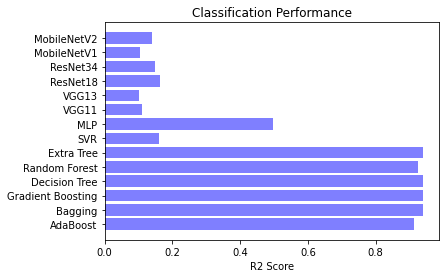

In [73]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('R2 Score')
plt2.title('Classification Performance')
plt2.show()